In [95]:
import numpy as np
from math import pi 
import scipy
from scipy import signal
from matplotlib import pyplot as plt

# Question 1

In [246]:
f1 = 900 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

## Computing the filter parameters

In [97]:
r = np.exp(-b1*pi*T)
r

0.9614911598014075

In [98]:
theta = 2*pi*f1*T
theta

0.3534291735288517

## Pole zero plot of H(z)

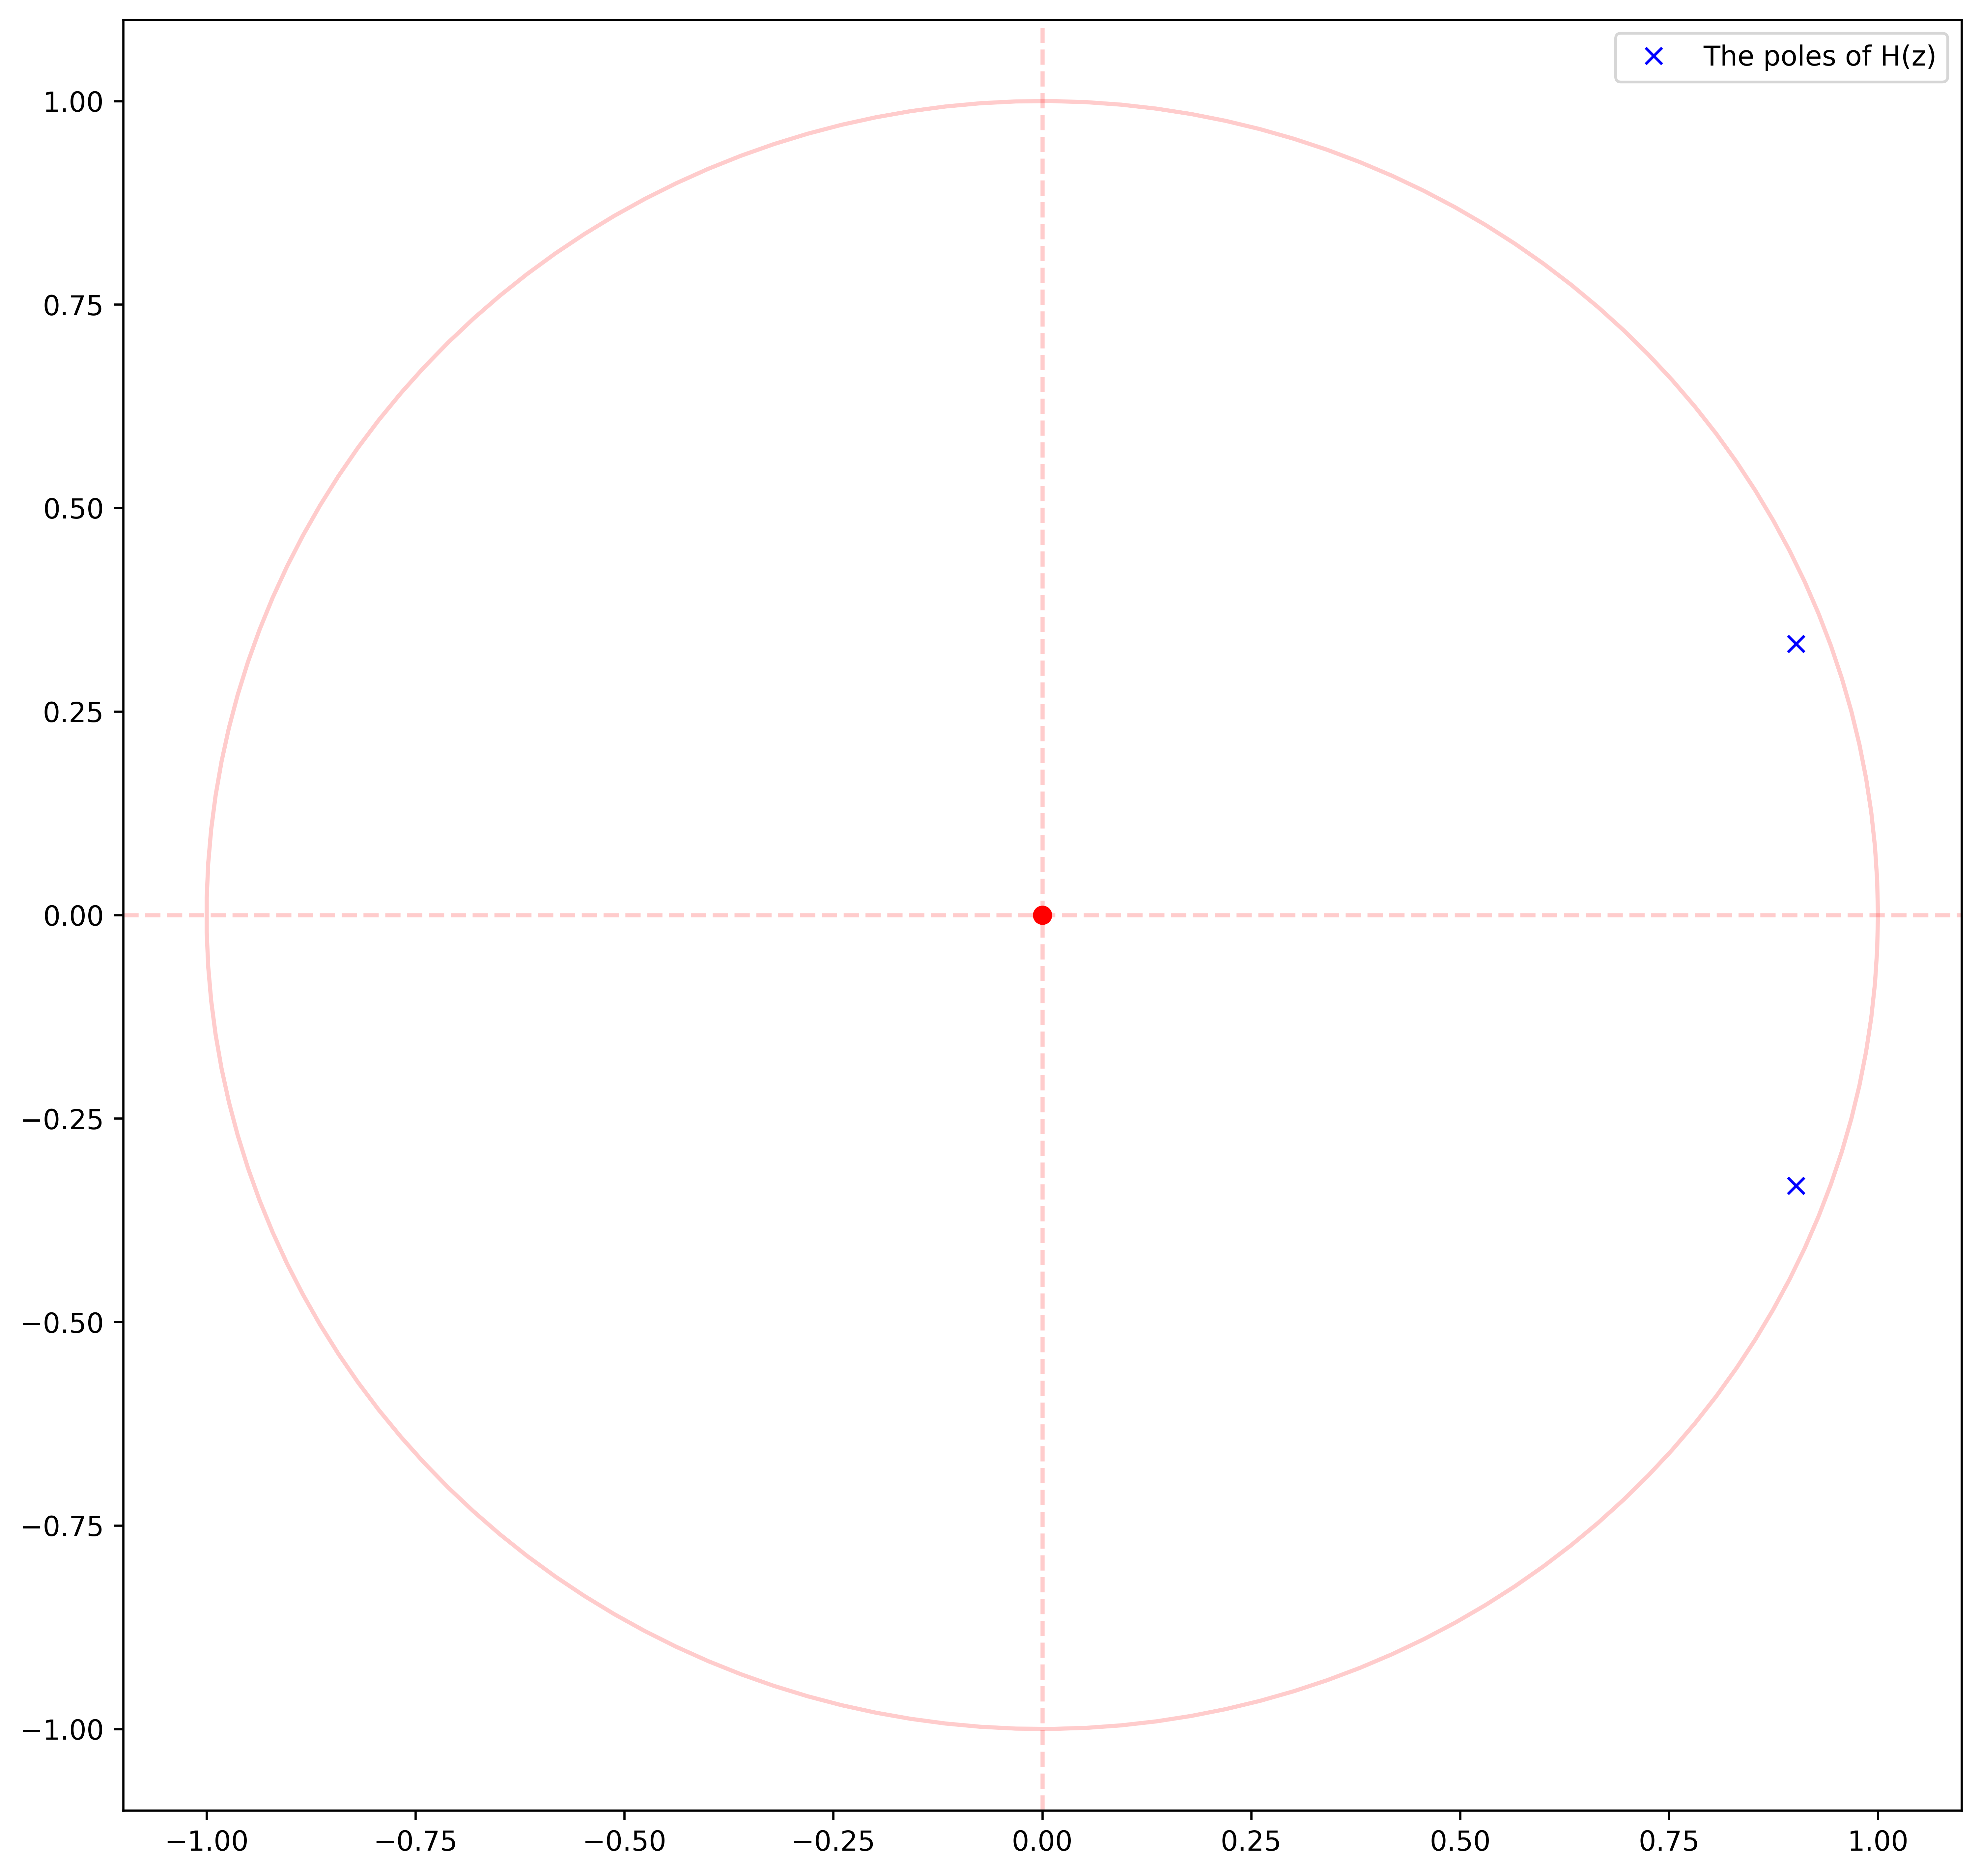

In [190]:
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(12, 12))
plt.plot(r*np.cos(theta), r*np.sin(theta), 'bx')
plt.plot(r*np.cos(-theta), r*np.sin(-theta), 'bx')
angle = np.linspace( 0 , 2 * np.pi , 150 ) 

radius = 1

x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
plt.plot(x, y, 'r', alpha = 0.2)

plt.axvline(0, c = 'r', ls='--', alpha=0.2)
plt.axhline(0, c = 'r', ls='--', alpha=0.2)
plt.plot(0, 0, 'ro')
plt.legend(["The poles of H(z)"])

## H(z)

In [100]:
def getFilterDenCoef(F1, B1, Fs):
    r, theta = np.exp(-b1*pi*T), 2*pi*f1*T
    return np.array([1, -2*r*np.cos(theta), r*r])

In [101]:
num = np.array([1])
den = getFilterDenCoef(f1, b1, fs)

### Displaying H(z)

In [187]:
s = "{a0} + {a1} z^-1 + {a2} z^-2".format(a0 = den[0], a1 = den[1], a2 = den[2])
print("H(z) = \n")
print(" "*(len(s)//2) + "1\n" + "-"*len(s)+"\n"+s)

H(z) = 

                            1
--------------------------------------------------------
1.0 + -1.8041253513834825 z^-1 + 0.9244652503762558 z^-2


In [192]:
w, h = scipy.signal.freqz(b=num, a=den, fs = fs)

## Magnitude (dB vs Frequency)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


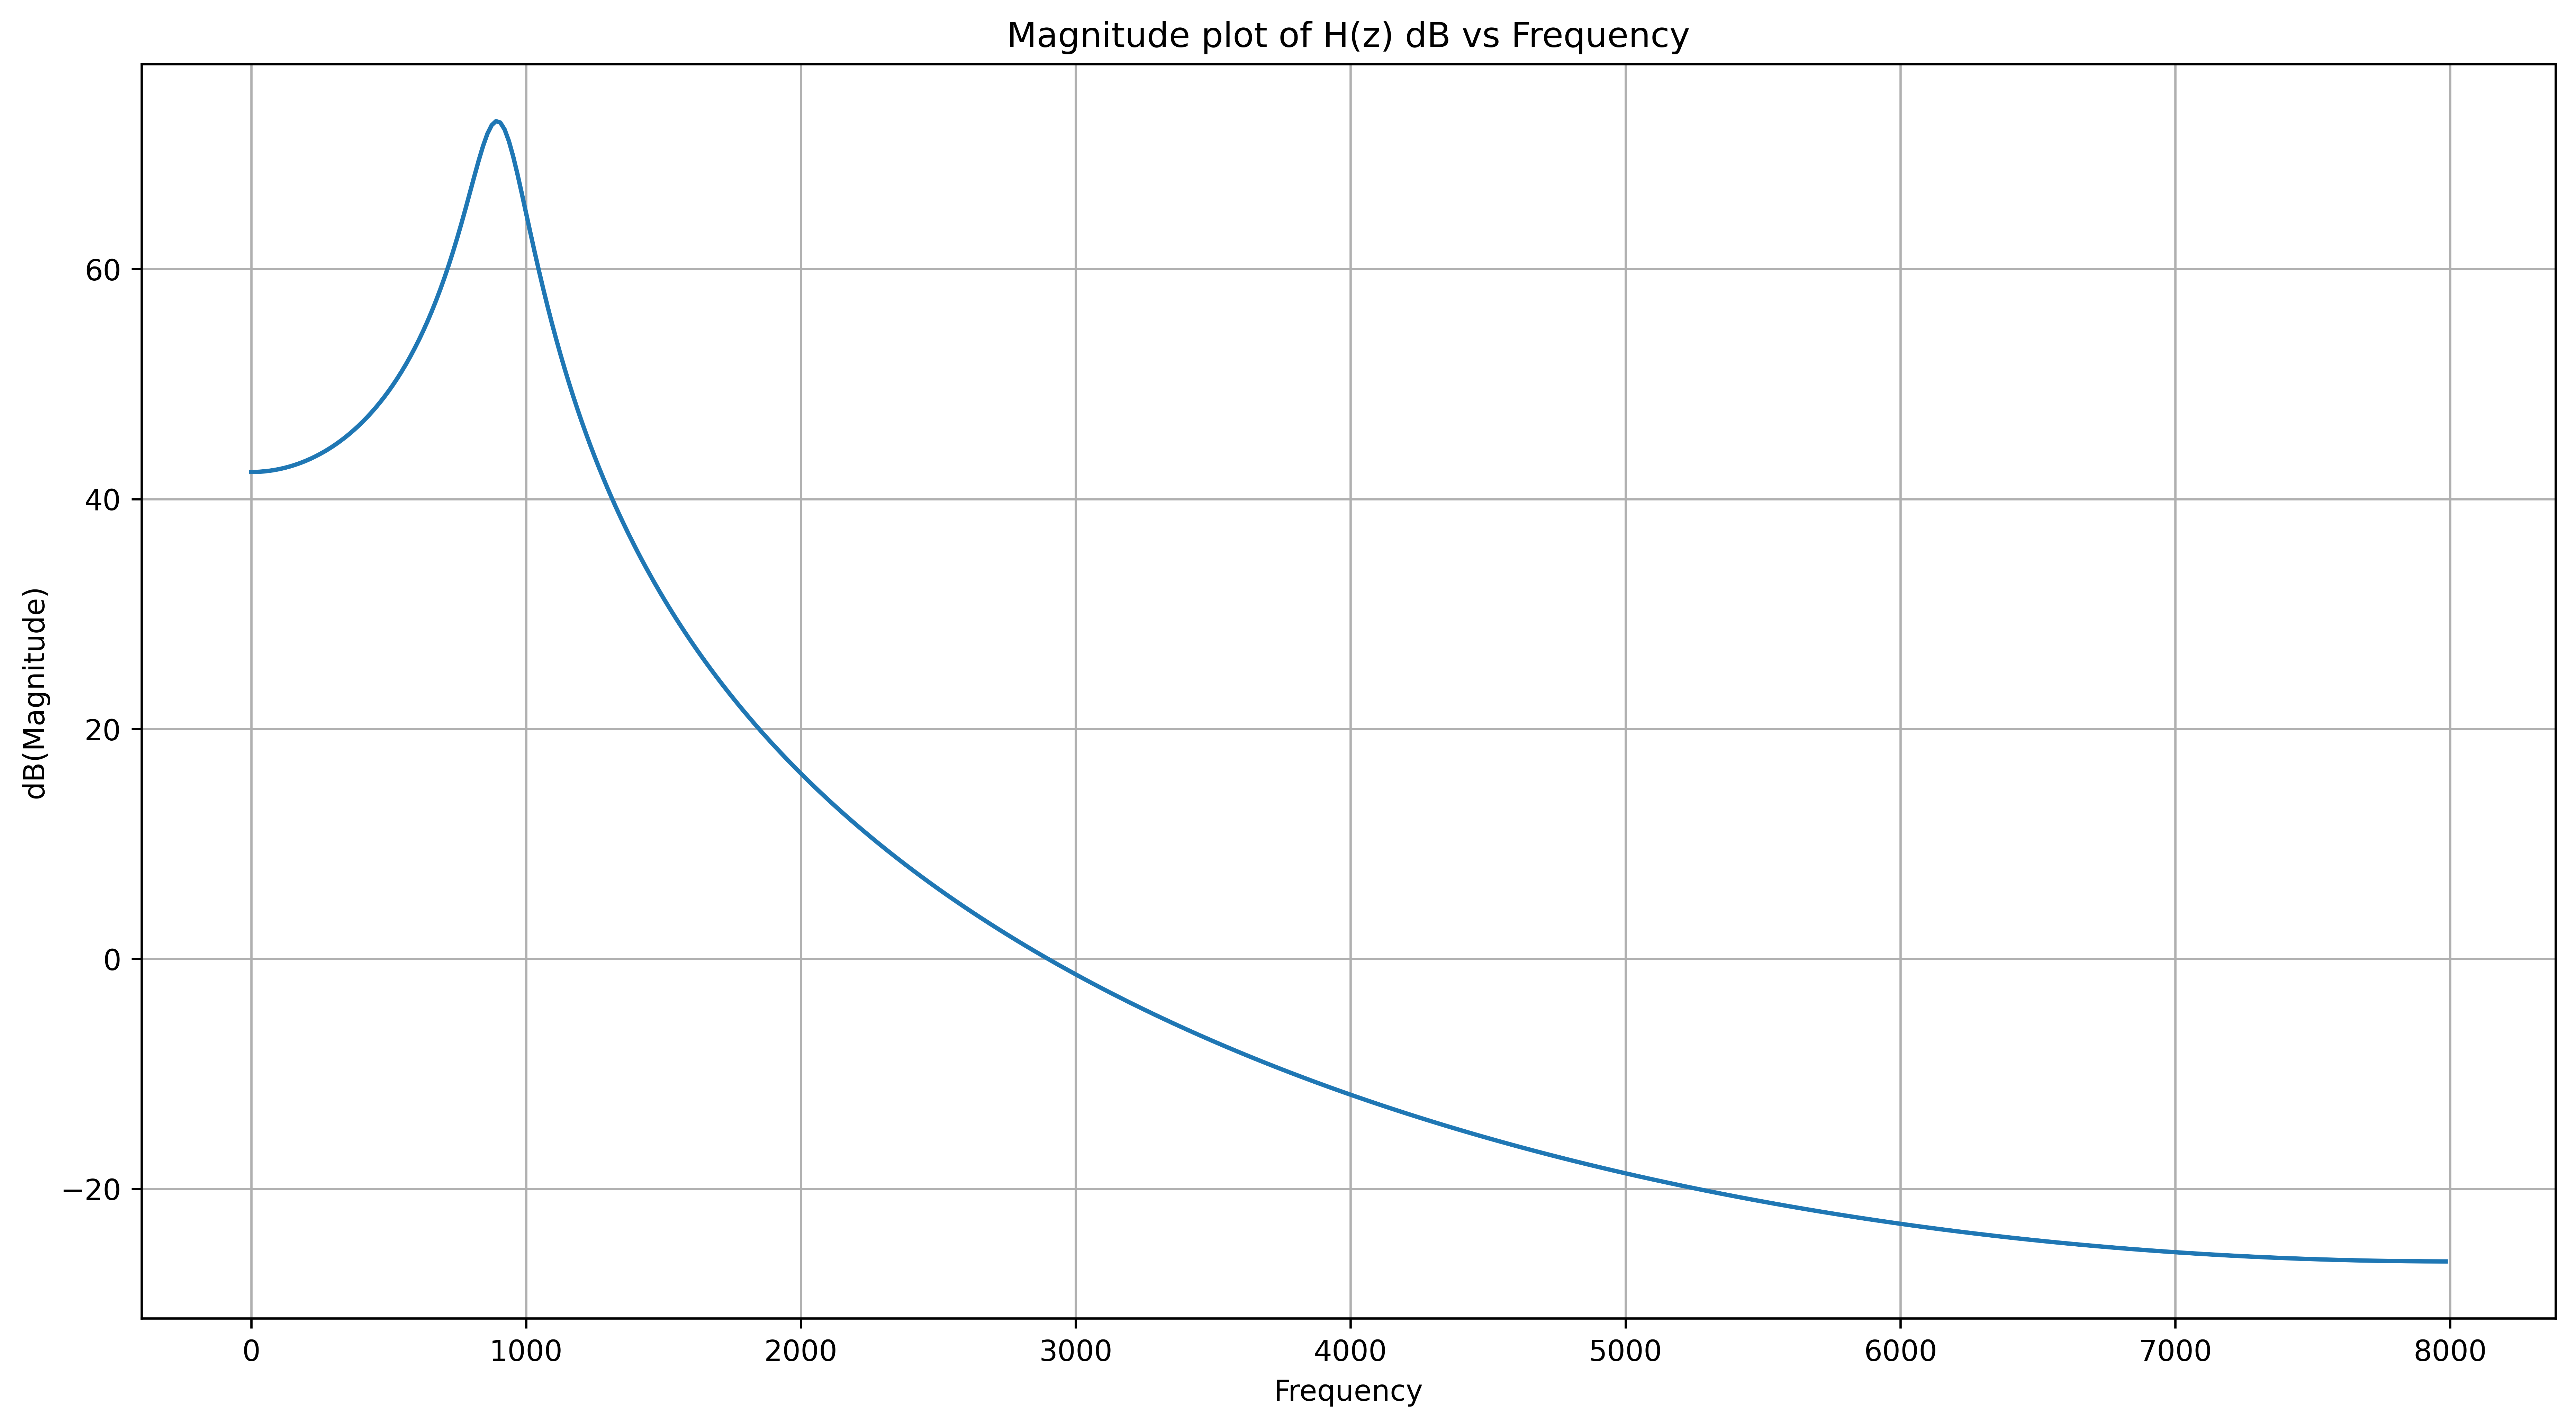

In [198]:
plt.figure(figsize=(15, 8))
plt.plot(w, 20*np.log(np.sqrt(h*np.conjugate(h))))
plt.xlabel("Frequency")
plt.ylabel("dB(Magnitude)")
plt.title("Magnitude plot of H(z) dB vs Frequency")
plt.grid(True)

In [142]:
w, mag, phase = scipy.signal.dbode((num, den, 1))

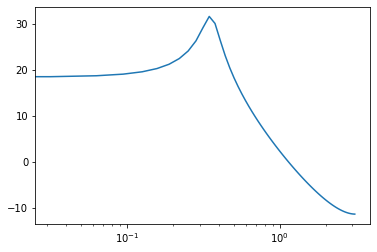

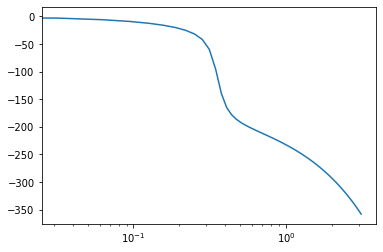

In [145]:
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [199]:
tout, yout = scipy.signal.dimpulse(system = (num,den,1), n=200)

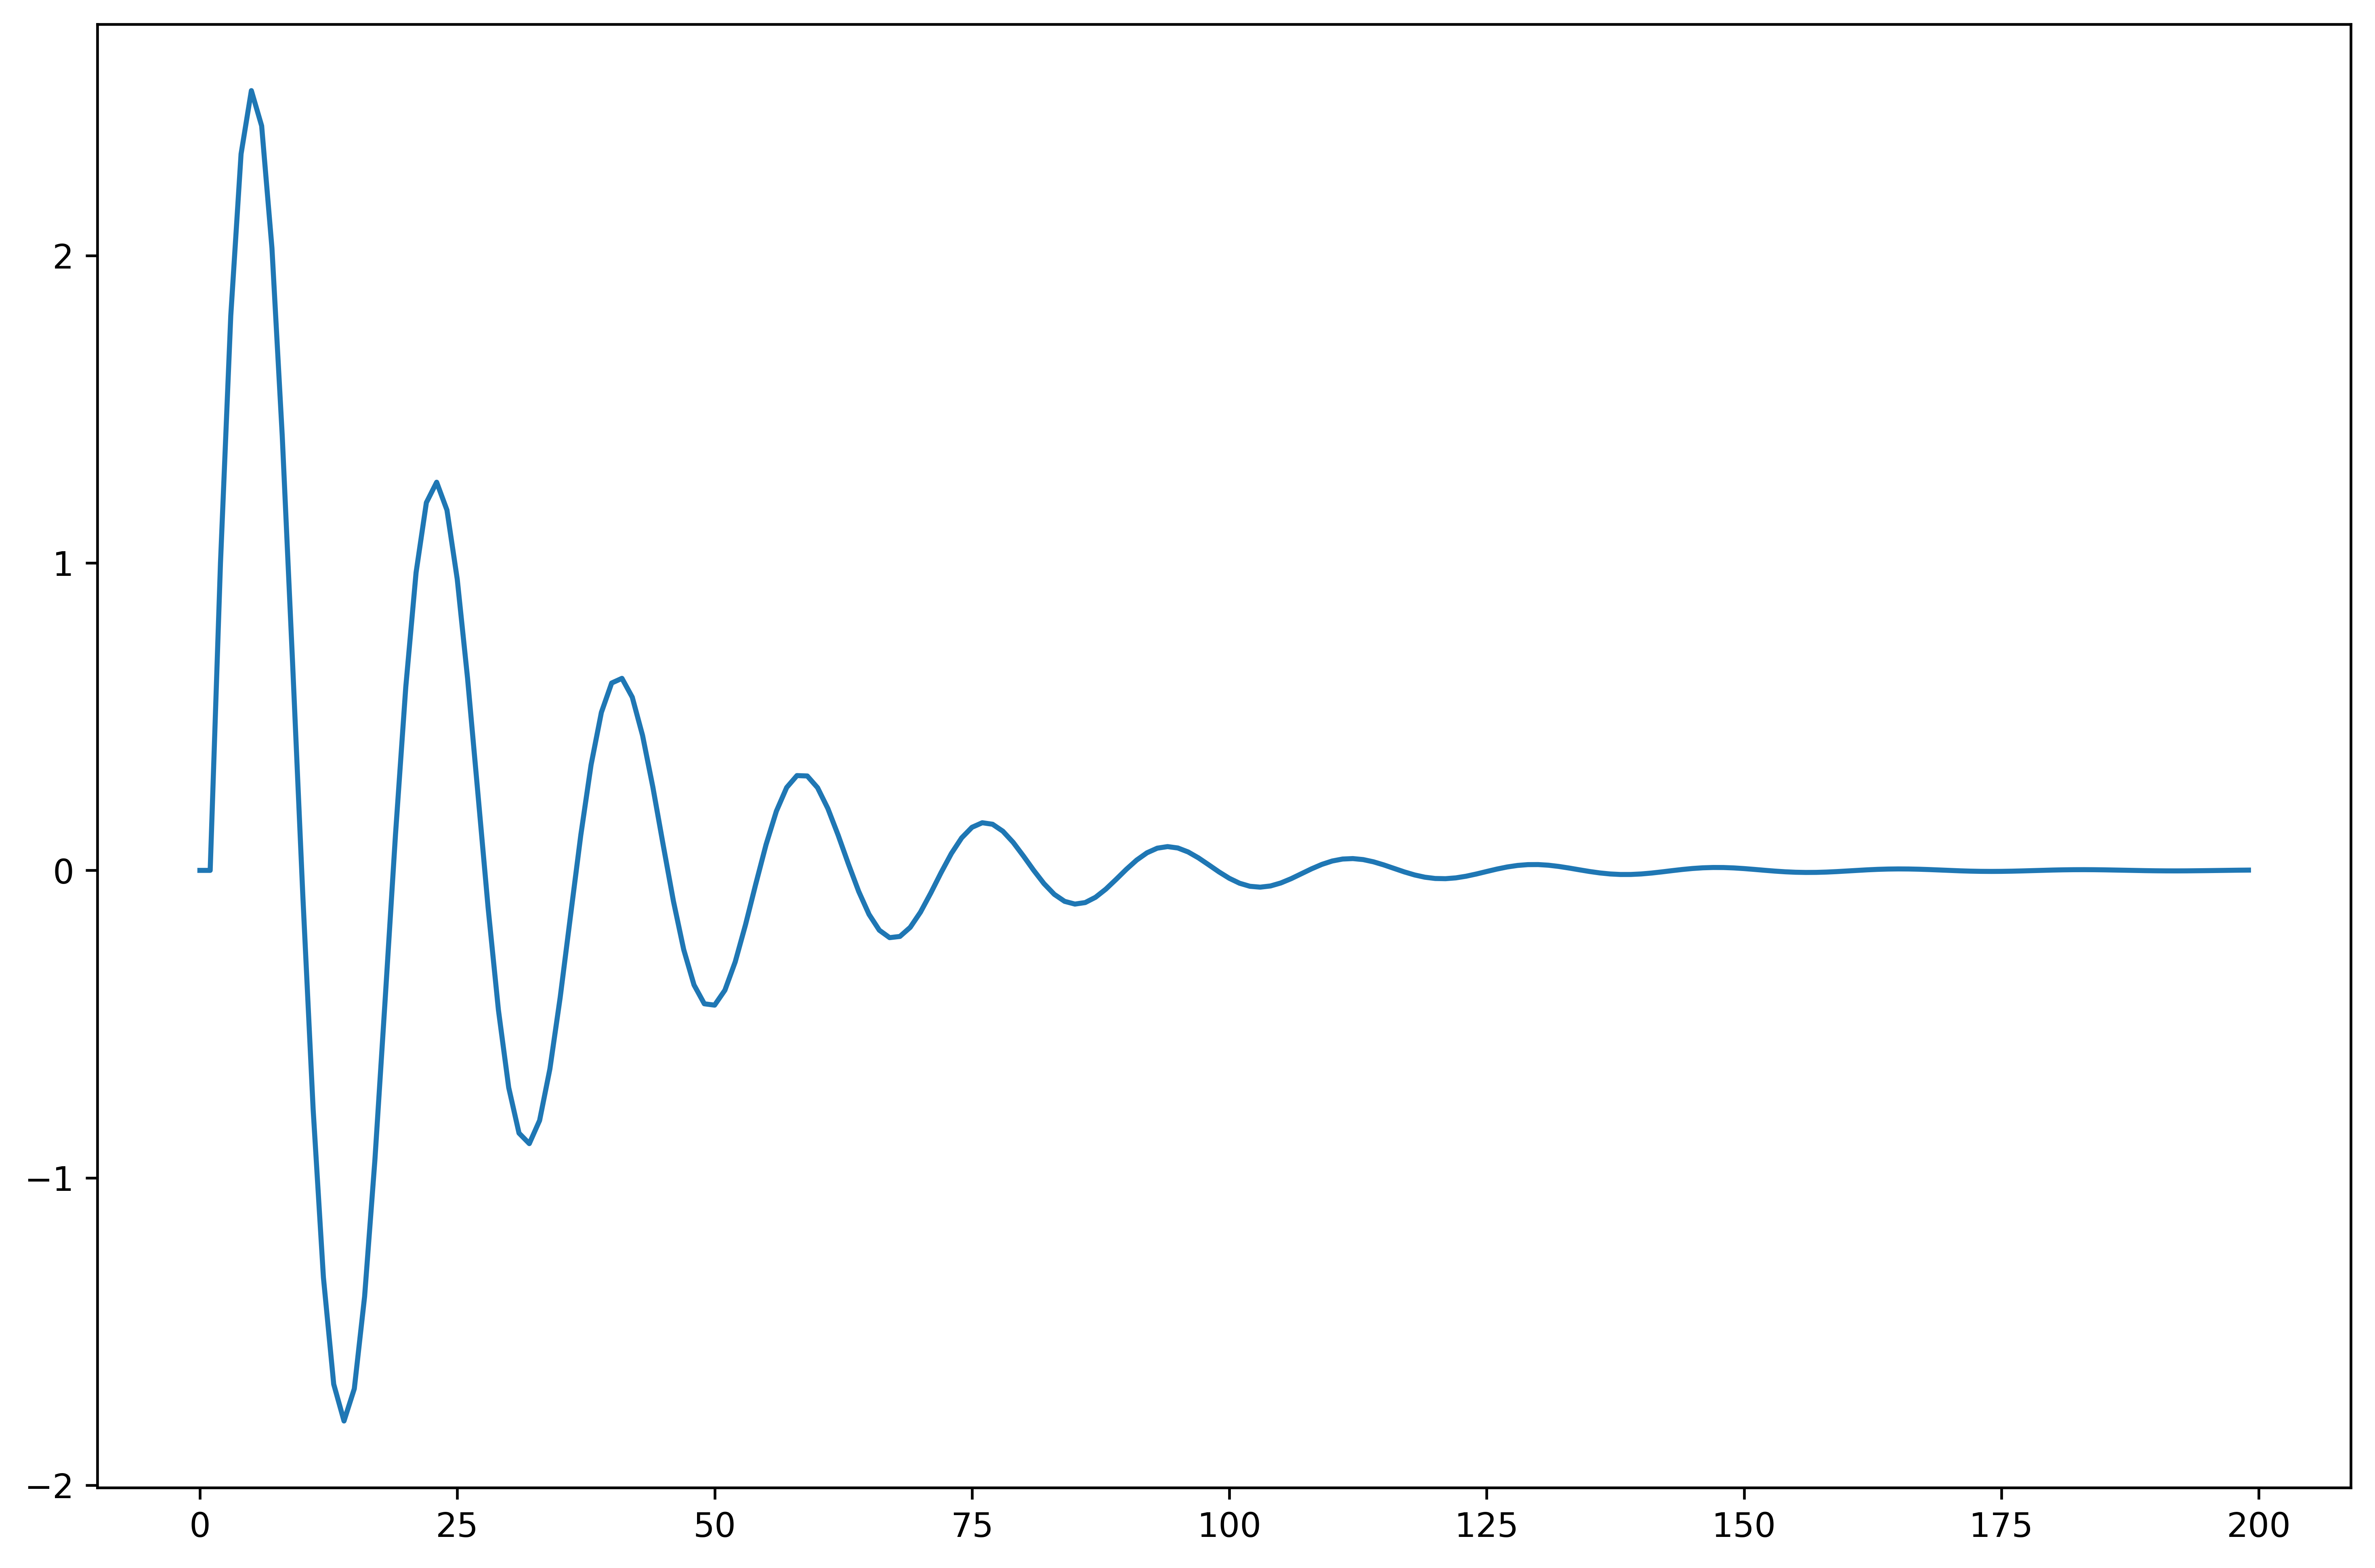

In [200]:
plt.figure(figsize=(12, 8))
#plt.plot(tout, 3*np.exp(-b1*pi*tout))
plt.plot(tout, np.squeeze(yout))

In [201]:
def computeImpRes(ini, samples, r, theta):
    #computing the impulse response from the difference equations
    y = np.zeros((samples, 1))
    y[0], y[1], y[2] = ini
    for i in range(3, samples):
        y[i] = 2*r*np.cos(theta)*y[i-1] - r*r*y[i-2]
    return y

In [202]:
yImp = computeImpRes([1, 2*r*np.cos(theta), 4*r*r*np.cos(theta)*np.cos(theta) - r*r], 100, r, theta)

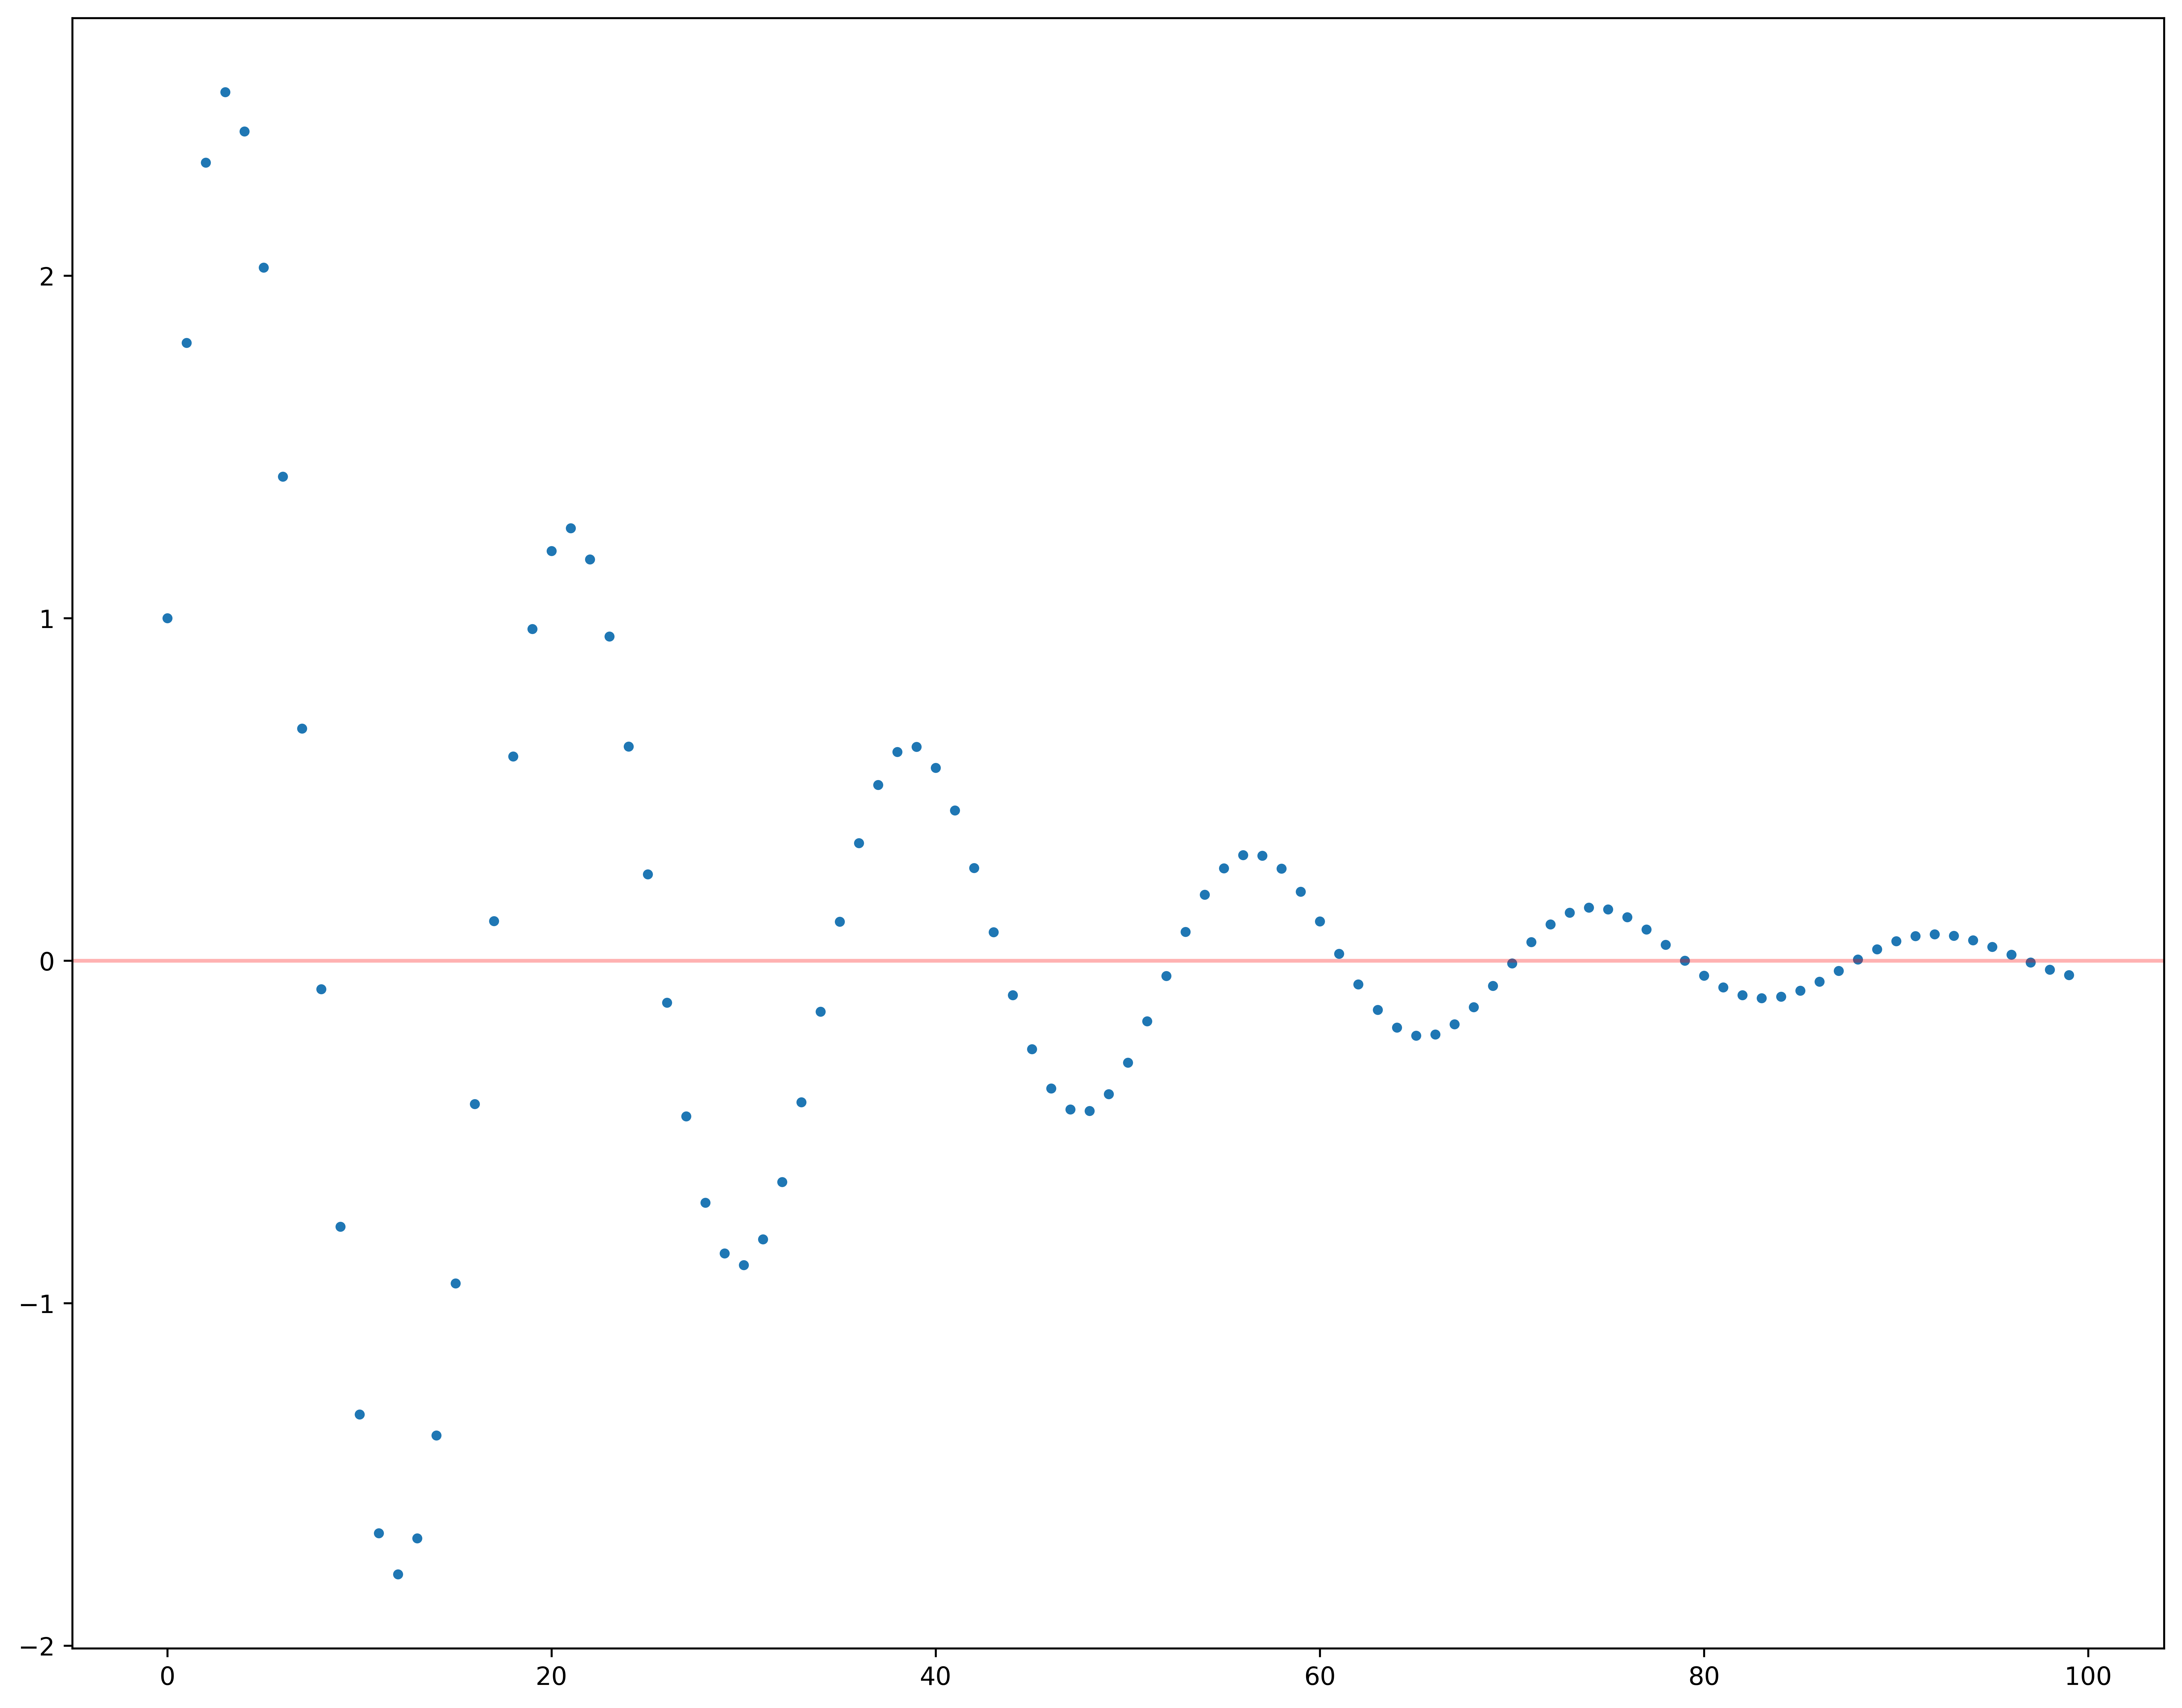

In [205]:
plt.figure(figsize=(15, 12))
plt.plot(yImp, '.')
plt.axhline(0, c = 'r', alpha=0.3)

# Question 2

In [297]:
F0 = 160

In [298]:
def computeResponse(x, samples, r, theta):
    #computing the impulse response from the difference equations
    assert x.shape[0]==samples
    y = np.zeros((samples, 1))
    y[0] = x[0] #assumed casual
    y[1] = x[1] + 2*r*np.cos(theta)*y[0]
    y[2] = x[2] + 2*r*np.cos(theta)*y[1] - r*r*y[0]
    for i in range(3, samples):
        y[i] = x[i] + 2*r*np.cos(theta)*y[i-1] - r*r*y[i-2]
    return y

In [324]:
dur = 0.5
timeSpace = np.linspace(0, dur, int(dur*fs))

In [325]:
def triagInput(P, samples, width = 4, start = 0):
    #start = {0, 1} whether to start at 0 or the next non-zero sample
    x = np.zeros((samples, 1))
    peaks= []
    for i in range(start, samples+start):
        if i%P==0:
            x[i] = 1 #populating the peaks
            peaks.append(i)
    for j in peaks:
        for k in range(width):
            if j-k>=0:
                x[j-k] = 1 - (k/width)
            if j+k<samples:
                x[j+k] = 1 - (k/width)
    return x



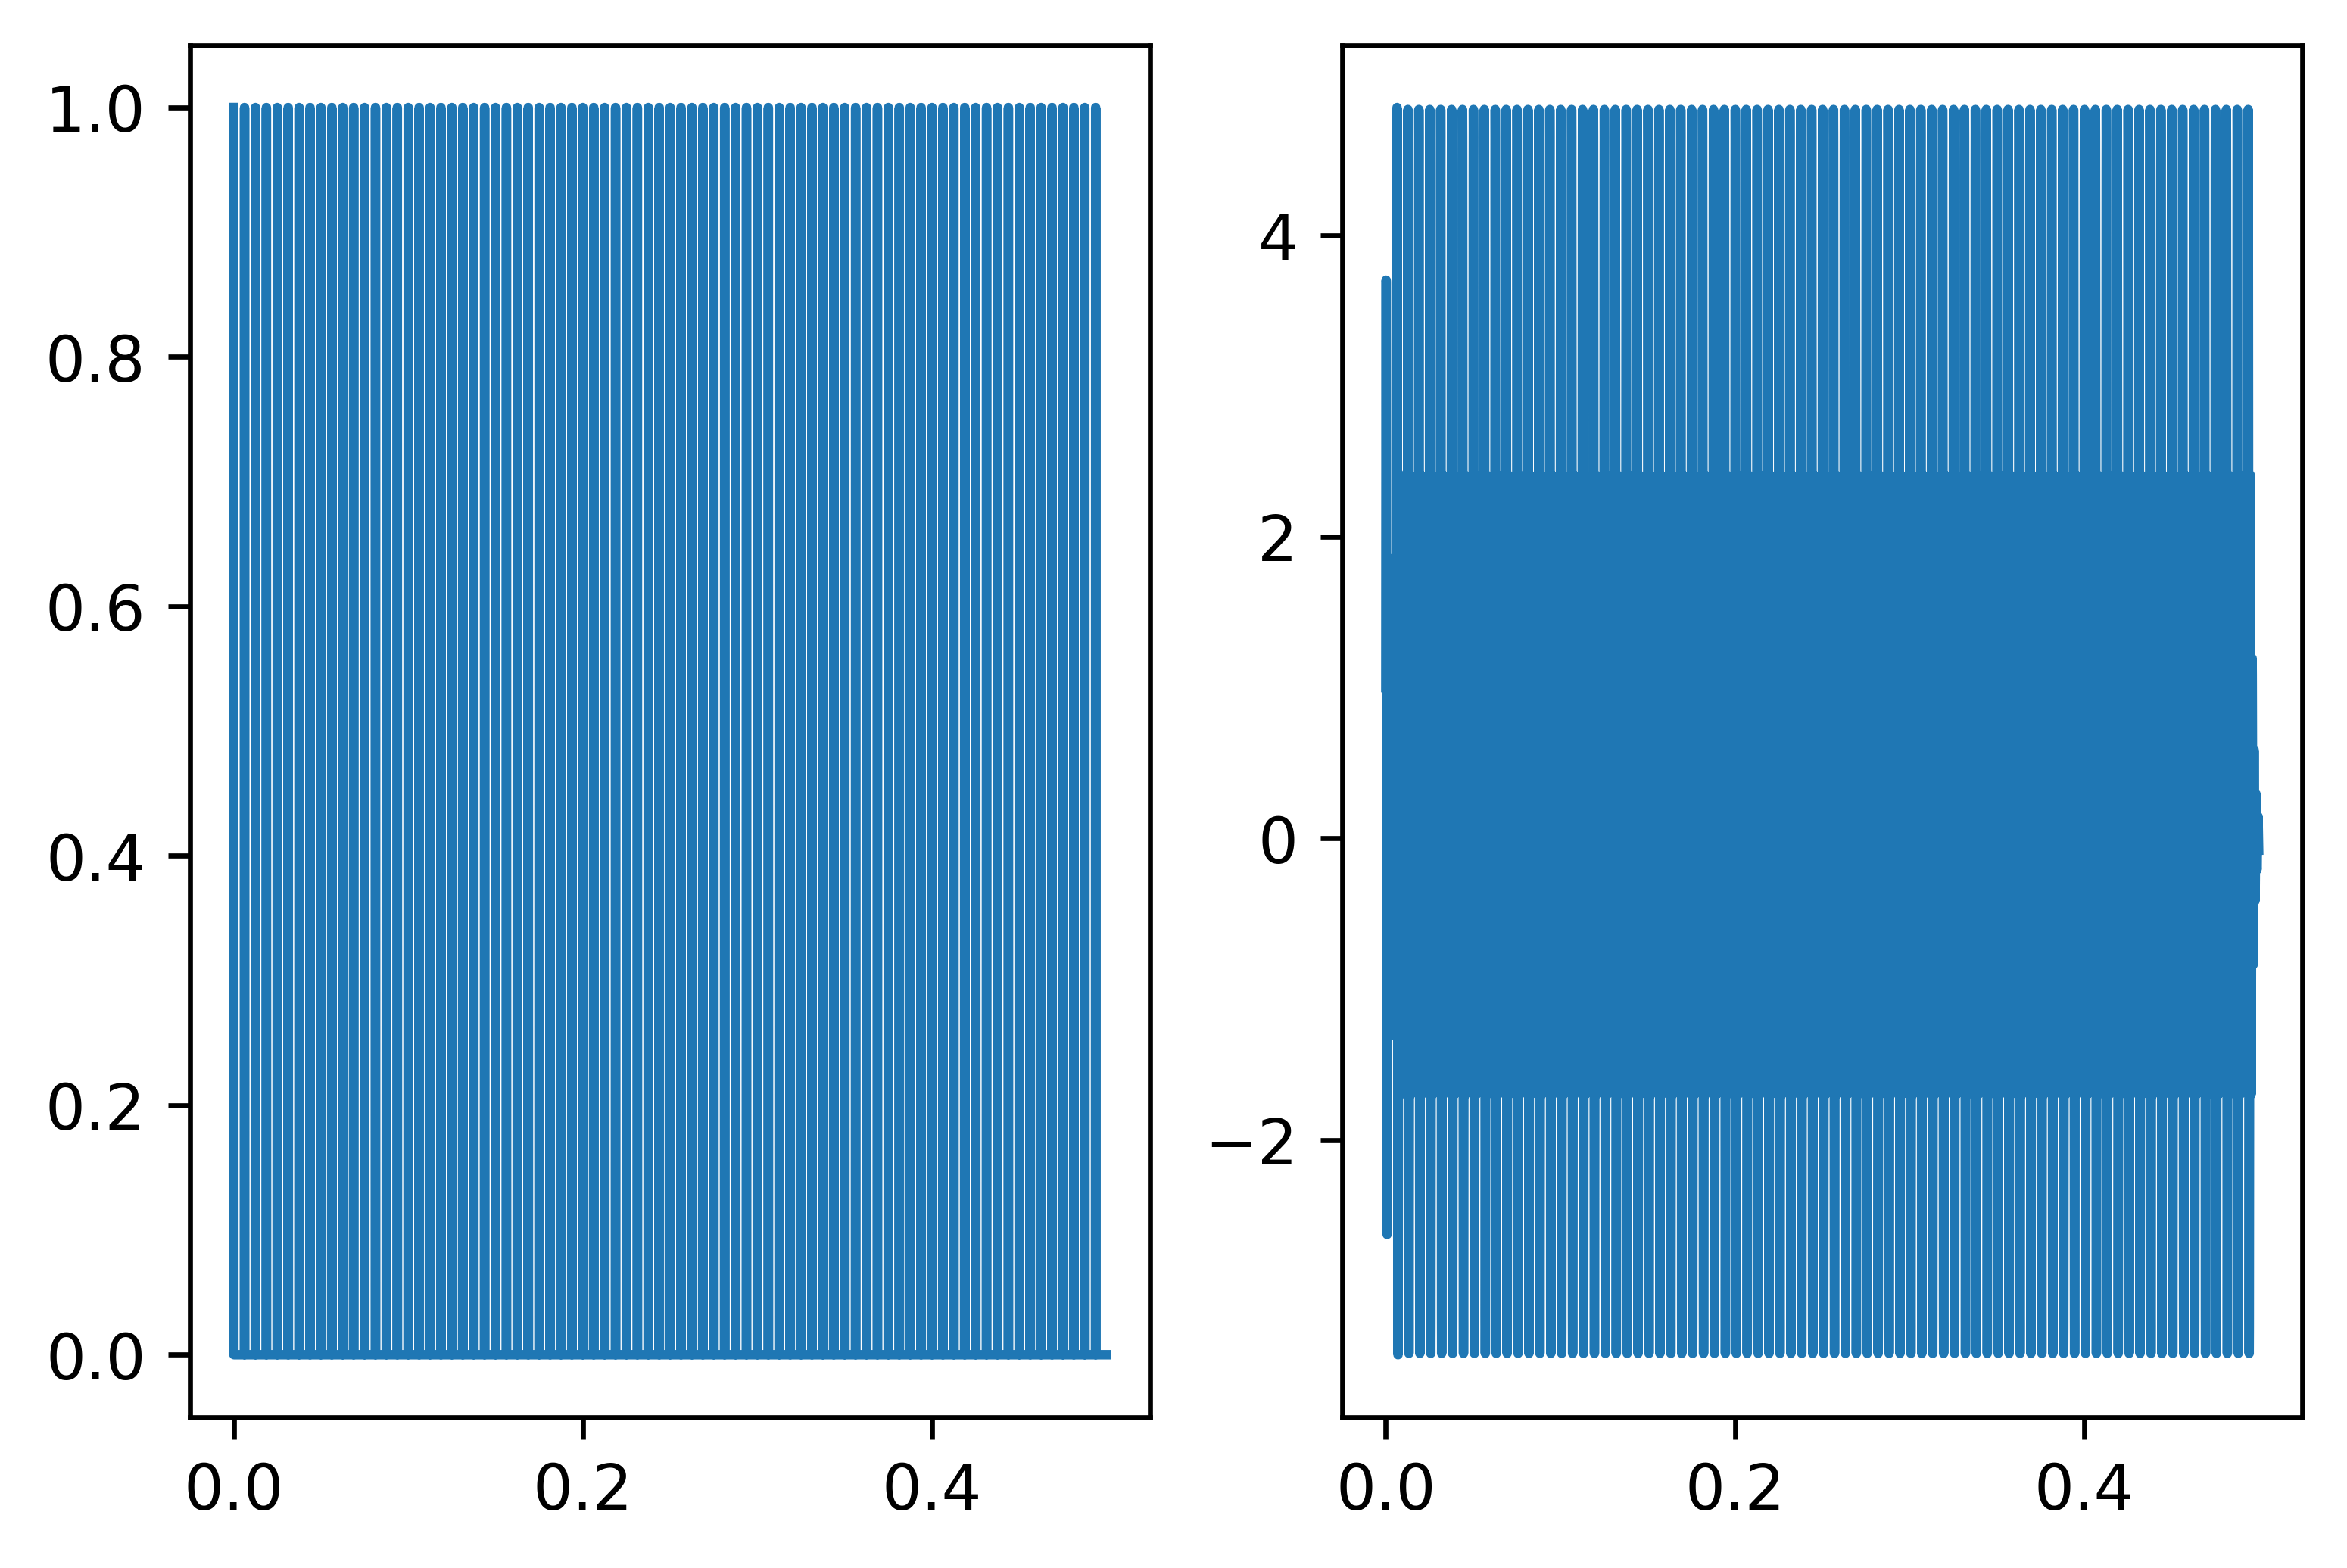

In [326]:
P = fs//F0
samp = len(timeSpace)
width = 2#no of samples on either side of the peak
plt.subplot(1, 2, 1)
plt.plot(timeSpace, triagInput(P, samp, width = width))
plt.subplot(1, 2, 2)
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = width), samp, r, theta))

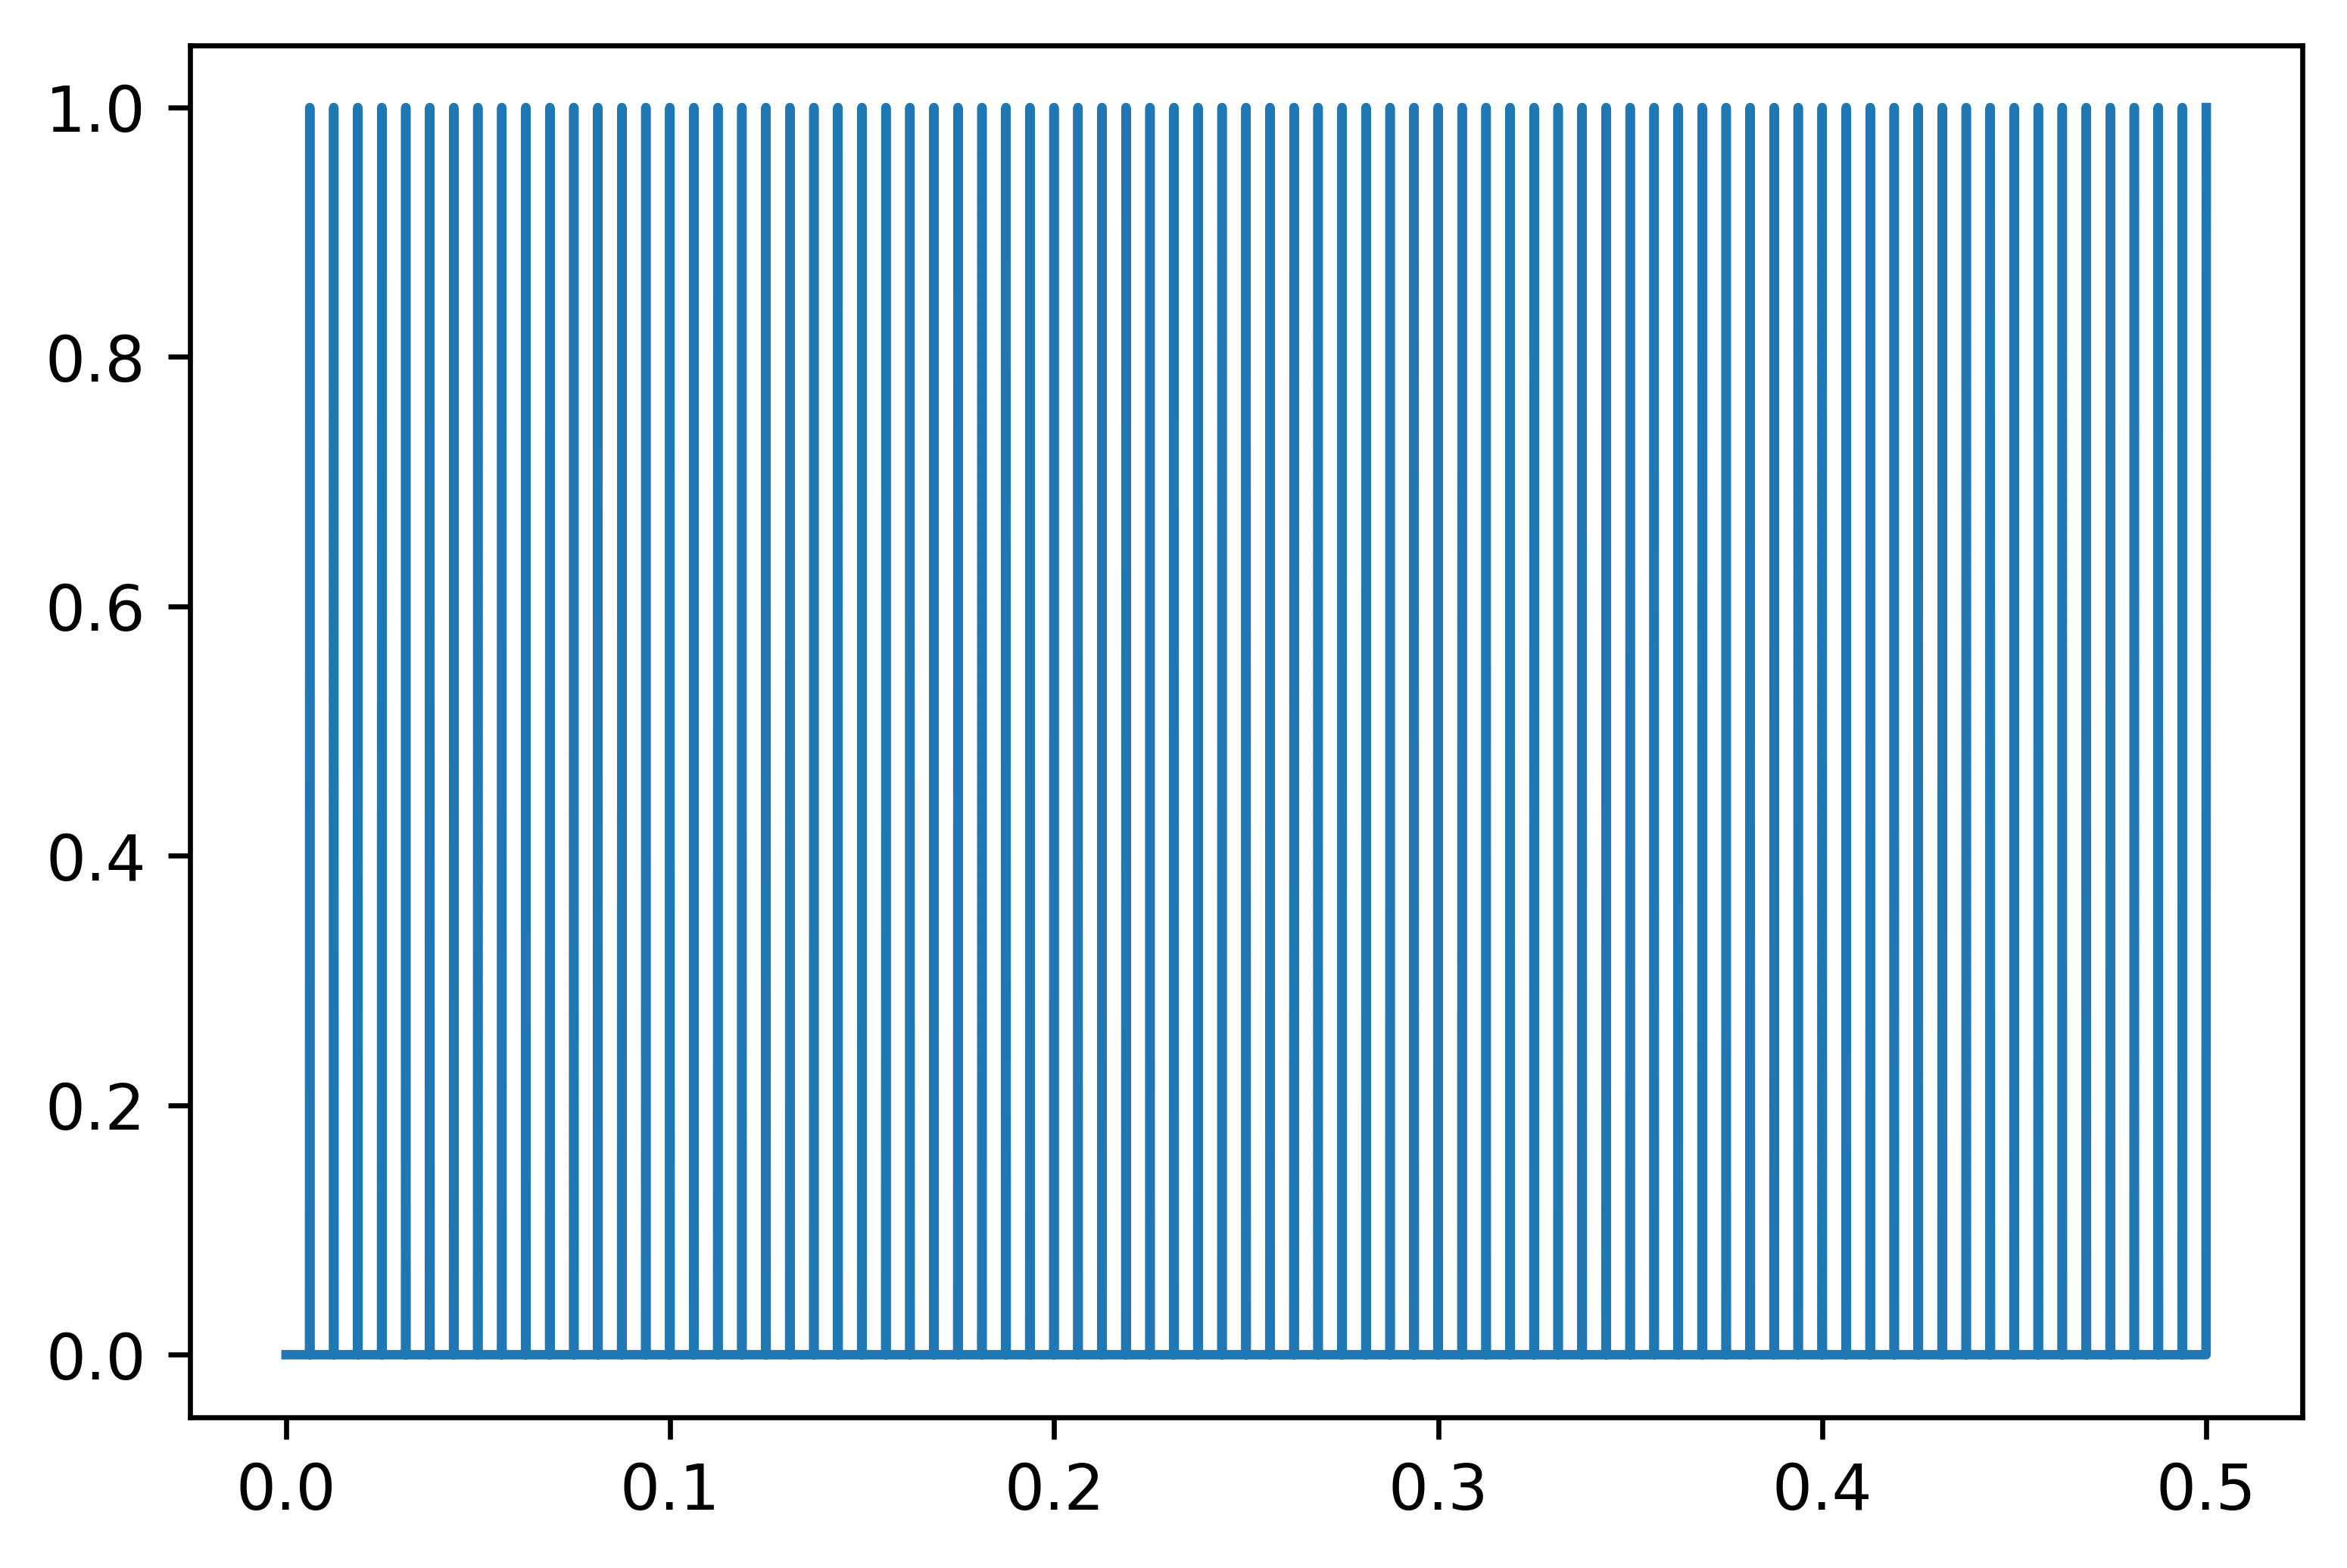

In [327]:
samp = len(timeSpace)
P = fs//F0
# x_100 = [1*np.exp(-i) for i in range(100)]
# x = []

# for i in range(samp//100):
#     x.extend(x_100)
x = [1 if i%P==0 else 0 for i in range(1, samp+1)]
plt.plot(timeSpace, np.array(x))

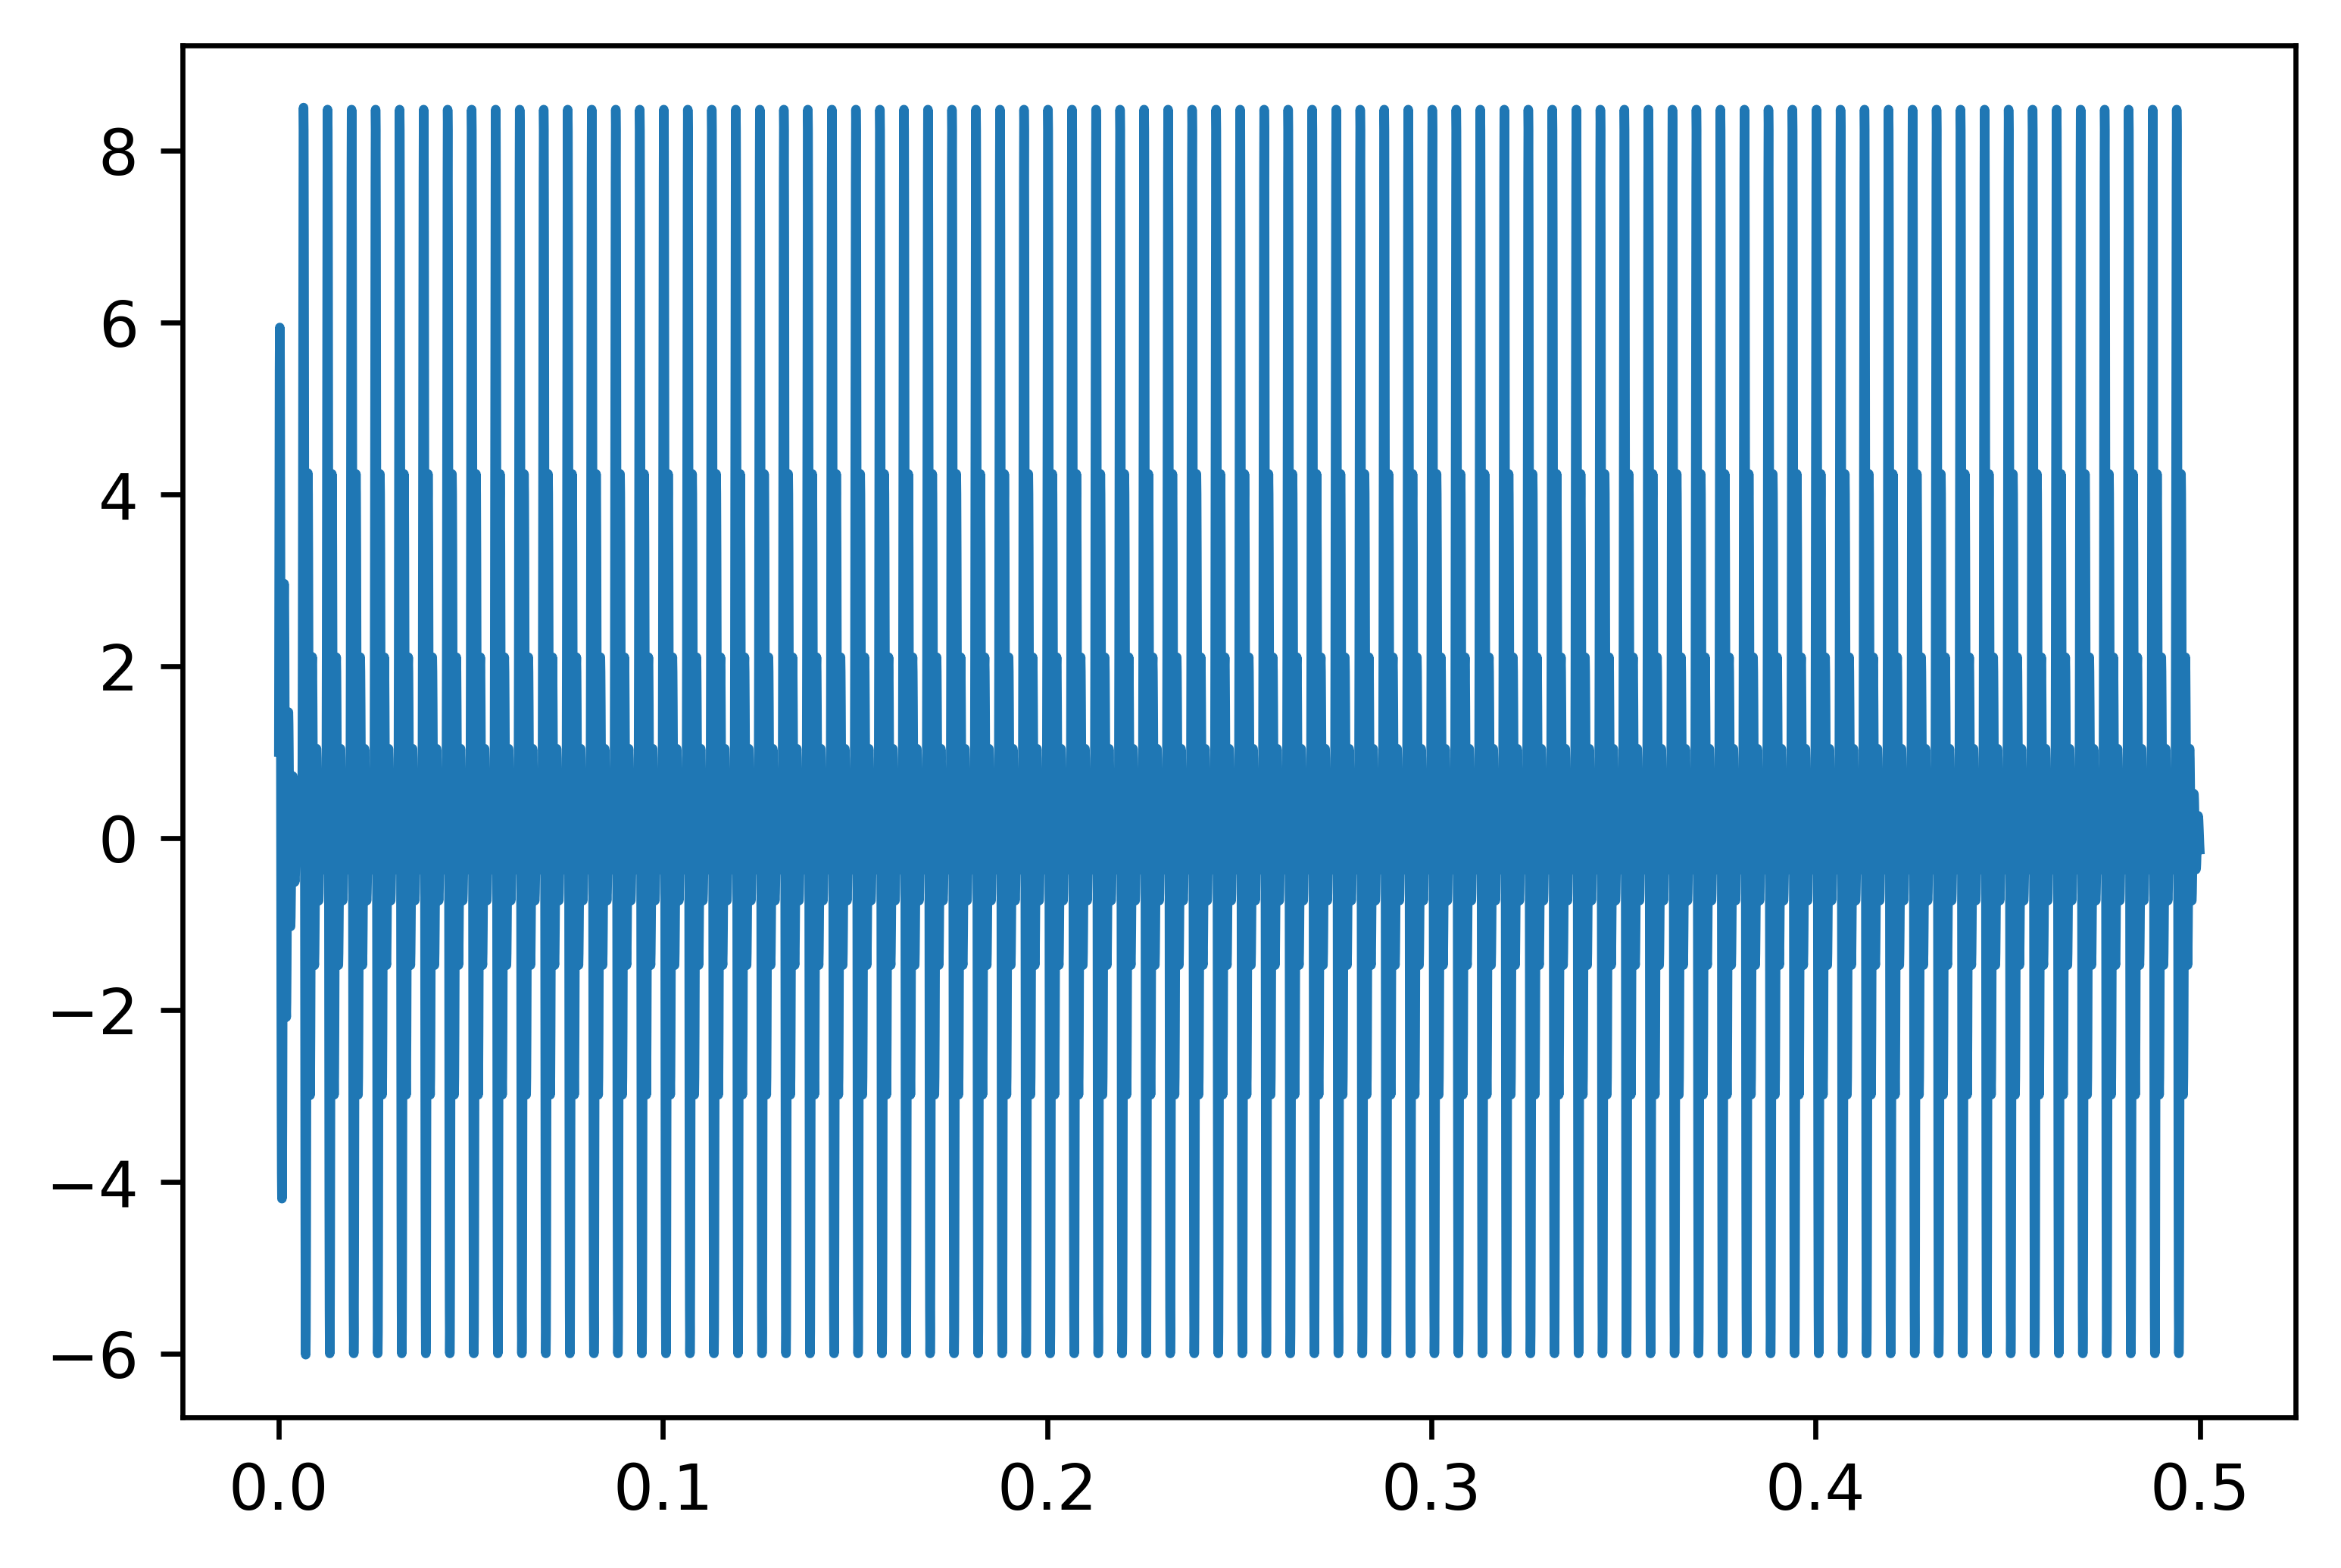

In [328]:
plt.plot(timeSpace, computeResponse(triagInput(P, samp, width = 4), samp, r, theta))

In [315]:
import IPython
y = computeResponse(triagInput(P, samp, width = 4), samp, r, theta)
display(IPython.display.Audio(y.squeeze().round(), rate=fs))

In [314]:
y.squeeze().round()

array([ 1.,  3.,  4., ..., -0., -0., -0.])

In [318]:
from IPython.display import Audio
wave_audio = np.sin(np.linspace(0, 3000, 20000))
Audio(wave_audio, rate=20000)

In [323]:
from scipy.io.wavfile import write

data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
write('test.wav', samp, y.squeeze().round().astype(int))

In [321]:
Audio('test.wav', 200000)

OSError: [WinError 6] The handle is invalid